In [1]:
"""
Created on Thu Apr 16 17:25:36 2020

@author: maddalena
"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import matplotlib.gridspec as gridspec

In [2]:
# The SIR model differential equations.
def deriv(y, t, N, beta,gamma):
    S,I,R = y

    dSdt = -(beta*I/N)*S 
    dIdt = (beta*S/N)*I - gamma*I 
    dRdt = gamma*I 
    
    return dSdt, dIdt, dRdt

In [3]:
#Integration of the differential equations
    
def time_evo(N,beta,gamma,I0=1,R0=0,t=np.arange(0,365)):
    # Definition of the initial conditions
    # I0 and R0 denotes the number of initial infected people (I0) 
    # and the number of people that recovered and are immunized (R0)
    
    # t ise the timegrid
    
    S0=N-I0-R0  # number of people that can still contract the virus
    
    # Initial conditions vector
    y0 = S0, I0, R0

    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N,beta,gamma))
    S, I, R = np.transpose(ret)
    
    return (t,S,I,R)

In [4]:
#Show the result

fin_result=time_evo(1000,0.5,1/14)

t=fin_result[0]
s_vec=fin_result[1]
i_vec=fin_result[2]
r_vec=fin_result[3]

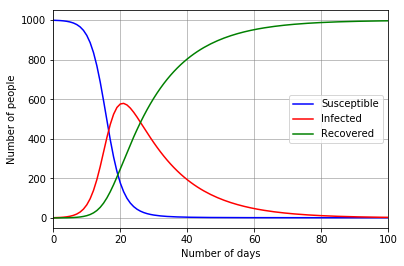

In [5]:
#SIR MODEL PLOT

plt.plot(t, s_vec, 'b', label='Susceptible')
plt.plot(t, i_vec, 'r', label='Infected')
plt.plot(t, r_vec, 'g', label='Recovered')
#plt.plot(t, m_vec, 'k', label='Deaths')
#plt.plot(t, i_vec+r_vec, color='orange',linestyle='--', label='Infected + Recovered')
plt.legend(loc=5)
#plt.yscale('log')
#plt.ylim(0.5,3000)
plt.xlim(0,100)
plt.xlabel('Number of days')
plt.ylabel('Number of people')
plt.grid(color='gray', linestyle='-', linewidth=0.5)
#plt.savefig('plotsir05.png',dpi=300)
plt.show()

In [6]:
#IMPORT FILES WORLD
#i files sono: le righe sono le nazioni, le colonne i giorni del mese (DATE).

file_confirmed='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
file_deaths='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
file_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_confirmed=pd.read_csv(file_confirmed)
df_deaths=pd.read_csv(file_deaths)
df_recovered=pd.read_csv(file_recovered)

In [7]:
#Data manipulation and representation (World)

deaths_world=df_deaths.iloc[:,-1].sum()
recovered_world=df_recovered.iloc[:,-1].sum()
total_world=df_confirmed.iloc[:,-1].sum()

max_death_rate=round(deaths_world/(deaths_world+recovered_world)*100,1)
min_death_rate=round(deaths_world/total_world*100,1)

print('Total contaminated:',total_world)
print('Total deaths:',deaths_world)
print('Total recovered:',recovered_world)

print('Based on the WHO data, the death rate is between',min_death_rate,'% and',max_death_rate,'% of the confirmed case')

Total contaminated: 7766952
Total deaths: 429736
Total recovered: 3698304
Based on the WHO data, the death rate is between 5.5 % and 10.4 % of the confirmed case


In [8]:
def mortality_rate(f_asympt):
    recovered_tot=recovered_world+f_asympt*total_world
    return deaths_world/(deaths_world+recovered_tot)

print(mortality_rate(1)*100)
print(mortality_rate(2)*100)

f_asympt_grid=np.arange(0,2.5,0.1)

3.6127472805362126
2.1856231509966664


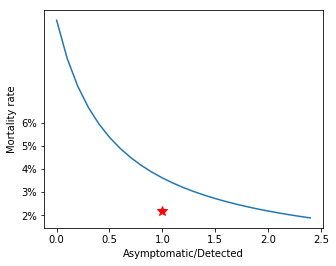

In [9]:
plt.figure(figsize=(5,4))
plt.plot(f_asympt_grid,mortality_rate(f_asympt_grid)*100)
plt.xlabel('Asymptomatic/Detected')
plt.ylabel('Mortality rate')
plt.yticks([1,2,3,4,5,6],['1%','2%','3%','4%','5%','6%'])
plt.plot(1,2.2,marker='*',color='red',markersize=11)
#plt.savefig('mortality_rate_plot.png',dpi=300)
plt.show()

In [10]:
def func_plot(df):
    y_world=[]
    n_cols=df.shape[1]
    #print(n_cols)
    for i in range(n_cols-4):
        y_world.append(df.iloc[:,i+4].sum())
    
    x_world2=df.columns[4:]
    x_world=pd.to_datetime(x_world2,infer_datetime_format=False)
    
    return (x_world,y_world)

peppe=func_plot(df_confirmed)

In [11]:
######## INPUT PARAMETERS ########
country='Italy'
t0=pd.to_datetime('2020-01-22')
#################################

mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
mask_coun_rec=df_recovered['Country/Region']==country

df_confirmed_coun=df_confirmed.loc[mask_coun,:]
df_deaths_coun=df_deaths.loc[mask_coun,:]
df_recovered_coun=df_recovered.loc[mask_coun_rec,:]

#somma tutte le ultime colonne (cioè valori dell'ultimo giorno) 
#dei 3 files, deaths, recovered, confirmed, per avere il TOT mondiale 
deaths_world_coun=df_deaths_coun.iloc[:,-1].sum()
recovered_world_coun=df_recovered_coun.iloc[:,-1].sum()
total_world_coun=df_confirmed_coun.iloc[:,-1].sum()

max_death_rate_coun=round(deaths_world_coun/(deaths_world_coun+recovered_world_coun)*100,1)
min_death_rate_coun=round(deaths_world_coun/total_world_coun*100,1)

print('Total contaminated:',country,total_world_coun)
print('Total deaths',country,deaths_world_coun)
print('Total recovered ',country,recovered_world_coun)

print('Based on the WHO data, the death rate in',country,'is between',min_death_rate_coun,'% and',max_death_rate_coun,'% of the total confirmed case')

Total contaminated: Italy 236651
Total deaths Italy 34301
Total recovered  Italy 174865
Based on the WHO data, the death rate in Italy is between 14.5 % and 16.4 % of the total confirmed case


/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


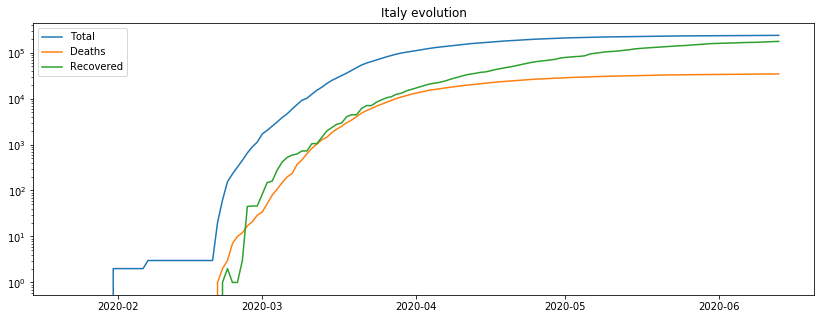

In [12]:
plt.figure(figsize=(14,5))
plt.plot(func_plot(df_confirmed_coun)[0],func_plot(df_confirmed_coun)[1],label='Total')
plt.plot(func_plot(df_deaths_coun)[0],func_plot(df_deaths_coun)[1],label='Deaths')
plt.plot(func_plot(df_recovered_coun)[0],func_plot(df_recovered_coun)[1],label='Recovered')
plt.legend()
plt.yscale('log')
plt.title(country+' evolution')
#plt.savefig('country_plot.png',dpi=300)
plt.show()

In [13]:
ytot=np.array(func_plot(df_confirmed_coun)[1])
ydeaths=np.array(func_plot(df_deaths_coun)[1])
yrec=np.array(func_plot(df_recovered_coun)[1])

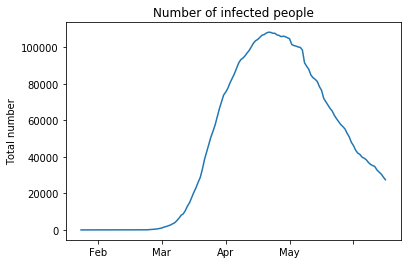

In [14]:
plt.plot(ytot-ydeaths-yrec)
#plt.yscale('log')
plt.xticks(np.arange(8,130,30),['Feb','Mar','Apr','May'])
plt.ylabel('Total number')
plt.title('Number of infected people')
#plt.savefig('activegermany.png',dpi=300)
plt.show()

In [15]:
#Generalization to other countries

def whichcountry(name):
        
    ######## INPUT PARAMETERS ########
    country=name
    t0=pd.to_datetime('2020-01-22')
    #################################

    mask_coun=df_confirmed['Country/Region']==country   # you can change the country here
    mask_coun_rec=df_recovered['Country/Region']==country

    df_confirmed_C=df_confirmed.loc[mask_coun,:]
    df_deaths_C=df_deaths.loc[mask_coun,:]
    df_recovered_C=df_recovered.loc[mask_coun_rec,:]

    ytot=np.array(func_plot(df_confirmed_C)[1])
    ydeaths=np.array(func_plot(df_deaths_C)[1])
    yrec=np.array(func_plot(df_recovered_C)[1])

    return ytot-ydeaths-yrec, ytot[-1], yrec[-1],ydeaths[-1]

In [16]:
print(whichcountry('Italy')[0])#confirmed last day
print(whichcountry('Italy')[2])#recovered last day

[     0      0      0      0      0      0      0      0      0      2
      2      2      2      2      2      2      3      3      3      3
      3      3      3      3      3      3      3      3      3      3
     19     59    150    221    311    438    593    821   1053   1577
   1835   2263   2706   3296   3916   5061   6387   7985   8794  10590
  13052  14955  17750  20603  23073  26062  28710  33190  38549  42681
  46638  50826  54030  57521  62013  66414  70065  73880  75528  77635
  80572  83049  85388  88274  91246  93187  94067  95262  96877  98273
 100269 102253 103616 104291 105418 106607 106962 107771 108257 108237
 107709 107699 106848 106527 105847 106103 105813 105205 104657 101551
 100943 100704 100179  99980  98467  91528  89624  87961  84842  83324
  82488  81266  78457  76440  72070  70187  68351  66553  65129  62752
  60960  59322  57752  56594  55300  52942  50966  47986  46175  43691
  42075  41367  39893  39297  38429  36976  35877  35262  34730  32872
  3171

In [17]:
#definition of time
df_time=pd.to_datetime(np.arange(len(ytot)),unit='D',origin=pd.Timestamp('2020-01-22'))

# list of top countries , with the higher number of cases

df_nofcases=pd.DataFrame(np.array(df_confirmed.iloc[:,1]))
df_nofcases.columns=['Country']
df_nofcases['Confirmed']=df_confirmed.iloc[:,-1]

df_nofcases
#np.array(df_nofcases.sort_values(by='Confirmed',ascending=False).head(6)['Country'])

,Country,Confirmed
0,Afghanistan,24102
1,Albania,1464
2,Algeria,10810
3,Andorra,853
4,Angola,138
5,Antigua and Barbuda,26
6,Argentina,30295
7,Armenia,16004
8,Australia,108
9,Australia,3128


In [18]:
countries_list=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']

In [19]:
df_active=pd.DataFrame(whichcountry(countries_list[0])[0])
df_active.columns=[countries_list[0]]
df_active.index=df_time

for i in range(0,len(countries_list)):
    df_active[countries_list[i]]=whichcountry(countries_list[i])[0]

df_active.columns=['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(df_active[-1:])

            Albania  Armenia  Austria  Azerbaijan  Belarus  Belgium  \
2020-06-13      389     9659      389        4146    23827    33721   

            Bosnia and Herzegovina  Bulgaria  Cyprus  Croatia  ...  Romania  \
2020-06-13                     611      1371     155       10  ...     4650   

            Serbia  Slovakia  Slovenia  Spain  Sweden  Switzerland  Turkey  \
2020-06-13     533       107        24  66093   46057          356   21798   

            Ukraine  United Kingdom  
2020-06-13    15798          252798  

[1 rows x 47 columns]


In [20]:
print(df_active['Germany'])

2020-01-22        0
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        1
2020-01-28        4
2020-01-29        4
2020-01-30        4
2020-01-31        5
2020-02-01        8
2020-02-02       10
2020-02-03       12
2020-02-04       12
2020-02-05       12
2020-02-06       12
2020-02-07       13
2020-02-08       13
2020-02-09       14
2020-02-10       14
2020-02-11       16
2020-02-12       16
2020-02-13       15
2020-02-14       15
2020-02-15       15
2020-02-16       15
2020-02-17       15
2020-02-18        4
2020-02-19        4
2020-02-20        4
              ...  
2020-05-15    15739
2020-05-16    15214
2020-05-17    14396
2020-05-18    13507
2020-05-19    14016
2020-05-20    13363
2020-05-21    12731
2020-05-22    12418
2020-05-23    12009
2020-05-24    11764
2020-05-25    11092
2020-05-26    10861
2020-05-27    10276
2020-05-28    10366
2020-05-29    10173
2020-05-30     9751
2020-05-31     9518
2020-06-01     9407
2020-06-02     8707


In [21]:
df_active.to_csv('active_infected',index=True)

In [22]:
data = pd.read_csv('active_infected')
#print(data['Italy'])

In [23]:
xdata=pd.to_numeric(range(data.shape[0]))
print(xdata)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]


In [24]:
n_countries = len(countries_list)

In [25]:
today=len(xdata)

In [26]:
array_country=whichcountry('Italy')[0]

def minimizer(R0,t1=today-5,t2=today):
    array_country_bis=array_country
    
    #true data
    ydata_inf_2=array_country[t1:t2]
    xdata_2=np.arange(0,len(ydata_inf_2))
    
    #model
    fin_result=time_evo(60*10**6,1/14*R0,1/14,I0=ydata_inf_2[0])
    i_vec=fin_result[2]
    i_vec_2=i_vec[0:len(xdata_2)]
    
    #average error
    error=np.sum(np.abs(ydata_inf_2-i_vec_2)/ydata_inf_2)*100
    return error

minimizer_vec=np.vectorize(minimizer)

In [27]:
#definition of the ideal r0

xgrid=np.arange(0.01,1.3,0.01)
ygrid=minimizer_vec(xgrid)#calcola per la prima
r0_ideal=round(xgrid[np.argmin(ygrid)],2)

In [28]:
#time(minimizer_vec(xgrid))

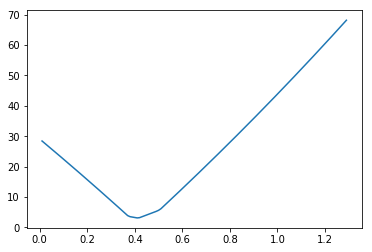

0.41


In [29]:
plt.plot(xgrid,ygrid)
plt.show()
print(r0_ideal)

In [30]:
time_window=5

def minimizer_gen(t1,t2,xgrid=np.arange(0.1,5,0.01)):

    ygrid=minimizer_vec(xgrid,t1=t1,t2=t2)
    r0_ideal=round(xgrid[np.argmin(ygrid)],2)

    return r0_ideal

In [31]:
print(whichcountry(countries_list[0])[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187 187 163 161 173 180 188 200 190 176 175 167 173 175 177 177 193
 205 220 215 232 232 233 240 253 266 269 273 274 284 305 327 349 346 389]


In [32]:
r0_time=[]
scangrid=np.linspace(0,5,100)
array_country=whichcountry(countries_list[0])[0] #inizializzo

for name in range(0, len(countries_list)):
    print(countries_list[name],array_country)
    
    for i in range(0,today-(time_window-1)):
        min_val=minimizer_gen(i,i+time_window,scangrid)
        r0_time.append(min_val)
        scangrid=np.linspace(0,min_val+5,200)
        print(i,min_val)
        
    array_country=whichcountry(countries_list[name+1])[0]

Albania [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   2  10  11  22  32  37  41
  50  54  57  62  68  72  85  98 108 124 151 147 156 169 168 176 177 185
 198 214 237 240 230 224 221 211 213 206 212 203 218 215 230 220 222 231
 238 251 251 257 282 288 286 289 281 272 263 239 233 229 219 206 206 199
 198 187 187 163 161 173 180 188 200 190 176 175 167 173 175 177 177 193
 205 220 215 232 232 233 240 253 266 269 273 274 284 305 327 349 346 389]
0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 5.0
48 5.58
49 6.49
50 3.93
51 2.83
52 2.52
53 2.53
54 2.01
55 2.01
56 2.22
57 2.47
58 2.63
59 2.91
60 2.78
61 2.42
62 2.42
63 2.09
64 1.39
65 1.64
66 1.5
67 1.27
68 1.45
69 1.56
70 1.88
71 1.97
72 1.89
73 1.32
74 0.76
75 0.55
76 0.73
77 0.72
78 0.75
79 0.87
80 0.97
81 1.17
82 1.18
83 1.4
84 1.06
85 1.19
86 1.03
87 1.36
88 1.5
89 1.37
90 1.38
91 1.47
92 1.46
93 1.49
94 1.11
95 0.89
96 0.77
97 0.55
98 0.33
99 0.29
100 0.35
101 0.59
102 0.56
103 0.5
104 0.58
105 0.76
106 0.67
107 0.57
108 0.28
109 0.32
110 0.64
111 1.47
112 1.76
113 1.56
114 1.25
115 0.75
116 0.38
117 0.43
118 0.93
119 1.01
120 1.27
121 1.17
122 1.46
123 1.69
124 2.02
125 1.66
126 1.44
127 1.23
128 1.38
129 1.15
130 1.42
131 1.52
132 1.54
133 1.35
134 1.18
13

103 1.32
104 1.3
105 1.36
106 1.44
107 1.49
108 1.5
109 1.4
110 1.32
111 1.24
112 1.29
113 1.26
114 1.35
115 1.37
116 1.28
117 1.2
118 1.12
119 1.17
120 1.15
121 1.24
122 1.22
123 1.19
124 1.09
125 1.07
126 1.13
127 1.17
128 1.24
129 1.22
130 1.16
131 1.02
132 0.94
133 0.96
134 1.02
135 1.12
136 1.14
137 1.08
138 0.92
139 0.8
Belgium [    0     0     0     0     0     0     0     0     0     0     0     0
     0     1     1     1     1     1     1     1     1     1     1     1
     1     1     0     0     0     0     0     0     0     0     0     0
     0     0     0     1     7    12    22    49   108   168   199   238
   266   310   310   555   684   881  1052  1232  1441  1743  2219  2485
  3063  3392  3686  4212  5340  6137  7718  9046  9859 10374 11004 11842
 12755 13901 14493 15196 16002 16482 17296 18080 18686 19584 19979 20094
 22026 22390 23014 23382 24056 25260 25956 26194 26507 27492 27991 28255
 28602 29060 29075 29349 29437 29541 29753 29965 30052 29711 30025 30289
 30604 

/Users/luigigiuseppeatzeni/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 5.0
40 10.0
41 10.25
42 8.81
43 7.36
44 4.66
45 3.16
46 3.03
47 2.82
48 4.28
49 4.66
50 5.87
51 3.93
52 3.72
53 3.37
54 3.36
55 3.44
56 3.65
57 3.48
58 2.81
59 2.86
60 2.49
61 3.09
62 3.58
63 3.66
64 3.18
65 3.21
66 2.35
67 1.96
68 1.85
69 1.96
70 2.03
71 1.94
72 1.81
73 1.61
74 1.63
75 1.6
76 1.56
77 1.62
78 1.53
79 1.44
80 1.49
81 1.47
82 1.5
83 1.63
84 1.3
85 1.36
86 1.41
87 1.42
88 1.39
89 1.28
90 1.26
91 1.29
92 1.3
93 1.2
94 1.15
95 1.14
96 1.11
97 1.07
98 1.07
99 1.07
100 1.07
101 1.07
102 1.04
103 1.03
104 1.03
105 1.12
106 1.11
107 1.11
108 1.07
109 1.07
110 1.04
111 1.0
112 1.06
113 1.07
114 1.07
115 1.07
116 1.07
117 1.04
118 1.03
119 1.06
120 1.07
121 1.07
122 1.04
123 1.03
124 1.03
125 1.03
126 1.03
127 1.03
128 1.03
129 1.03
130 1.03
131 1.0
132 0.99
133 1.02
134 1.03
135 1.03
136 1.03
137 1.03
138 1.03
139 1.03
Bosnia and Herzegovina [   0    0    0  

7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 5.0
40 7.44
41 6.94
42 5.76
43 4.33
44 3.84
45 4.58
46 4.86
47 6.29
48 6.75
49 4.43
50 5.59
51 4.58
52 4.14
53 4.09
54 4.61
55 4.25
56 4.56
57 3.22
58 2.81
59 2.59
60 2.82
61 3.07
62 3.24
63 3.15
64 2.78
65 2.27
66 1.94
67 2.02
68 2.05
69 2.02
70 2.05
71 1.77
72 1.7
73 1.45
74 1.56
75 1.48
76 1.47
77 1.3
78 1.17
79 1.09
80 1.01
81 0.91
82 0.86
83 0.91
84 0.98
85 0.9
86 0.95
87 0.9
88 0.71
89 0.69
90 0.63
91 0.76
92 0.69
93 0.71
94 0.63
95 0.59
96 0.76
97 0.75
98 0.75
99 0.78
100 0.58
101 0.5
102 0.44
103 0.52
104 0.69
105 0.83
106 0.97
107 0.69
108 0.51
109 0.36
110 0.43
111 0.49
112 0.69
113 0.8
114 0.87
115 0.8
116 0.76
117 0.78
118 0.76
119 0.9
120 0.98
121 1.05
122 0.85
123 0.71
124 0.75
125 0.84
126 0.94
127 1.01
128 0.97
129 0.99
130 0.93
131 1.04
132 1.0
133 

94 1.02
95 1.0
96 0.81
97 0.7
98 0.95
99 0.99
100 1.02
101 1.0
102 1.03
103 1.06
104 1.1
105 1.01
106 1.03
107 1.0
108 0.96
109 0.9
110 0.89
111 0.92
112 0.92
113 0.92
114 0.92
115 0.92
116 0.98
117 0.99
118 0.96
119 0.99
120 0.99
121 0.96
122 0.93
123 0.92
124 1.04
125 1.12
126 1.2
127 1.06
128 1.1
129 1.04
130 0.97
131 0.93
132 1.01
133 0.85
134 1.03
135 1.03
136 1.0
137 0.99
138 0.99
139 1.02
Georgia [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
   1   1   1   3   3   3   3   4   4   4  13  15  15  24  24  25  30  33
  32  33  37  39  42  48  51  58  61  65  68  69  76  73  83  89  94 108
 127 125 136 147 147 158 164 177 179 187 201 228 232 269 288 298 297 303
 307 304 309 307 312 331 335 337 333 349 352 367 357 361 355 332 331 325
 319 316 310 282 264 272 266 252 258 257 239 226 224 216 207 196 193 183
 166 153 158 145 166 158 149 147 144 142 132 122 116 119 124 124 133 135]
0 0.0
1 

7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 5.0
38 10.0
39 10.1
40 8.8
41 7.14
42 4.03
43 2.86
44 2.41
45 2.42
46 3.43
47 3.64
48 3.91
49 3.72
50 3.02
51 2.42
52 2.57
53 3.27
54 3.74
55 3.56
56 3.83
57 3.28
58 2.45
59 2.43
60 2.05
61 2.27
62 2.3
63 1.94
64 1.95
65 1.75
66 1.56
67 1.55
68 1.45
69 1.52
70 1.21
71 1.12
72 0.92
73 1.01
74 0.66
75 0.37
76 0.4
77 0.33
78 0.21
79 0.16
80 0.29
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.15
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.98
119 0.0
120 1.01
121 1.03
122 1.0
123 0.99
124 0.0
125 0.0
126 0.0
127 0.0
128 4.22
129 1.02
130 1.0
131 0.99
132 0.99
133 0.99
134 2.41
135 2.42
136 2.87
137

65 4.03
66 2.9
67 2.34
68 2.58
69 2.51
70 2.49
71 2.33
72 2.54
73 2.24
74 2.0
75 1.69
76 1.68
77 1.75
78 1.76
79 2.11
80 2.18
81 1.98
82 1.79
83 1.64
84 1.74
85 1.69
86 1.75
87 1.93
88 2.12
89 2.0
90 1.97
91 1.86
92 1.76
93 1.56
94 1.62
95 1.73
96 1.83
97 1.85
98 2.0
99 1.51
100 1.34
101 1.08
102 1.25
103 1.32
104 1.33
105 1.24
106 1.13
107 0.89
108 0.8
109 0.79
110 0.81
111 0.79
112 0.87
113 0.77
114 1.19
115 1.43
116 1.55
117 1.15
118 1.58
119 1.88
120 1.97
121 1.47
122 1.76
123 1.39
124 1.22
125 1.53
126 1.61
127 1.69
128 1.75
129 1.42
130 1.23
131 0.78
132 0.81
133 0.61
134 0.87
135 0.88
136 0.71
137 0.69
138 0.69
139 1.23
Kyrgyzstan [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   3   3   6  14  14  16  42  44  44  58  58  84  91 104 108 111
 123 134 137 179 191 233 241 258 290 318 347 354 366 370 370 3

4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 3.39
46 3.46
47 5.53
48 4.66
49 5.24
50 6.59
51 5.18
52 3.63
53 4.29
54 3.78
55 3.4
56 4.18
57 3.55
58 2.96
59 3.04
60 2.42
61 1.94
62 2.09
63 1.57
64 1.55
65 1.61
66 1.59
67 1.92
68 2.09
69 1.85
70 1.58
71 1.62
72 1.76
73 2.0
74 2.25
75 2.26
76 1.68
77 2.01
78 1.2
79 1.09
80 0.95
81 1.26
82 0.91
83 0.77
84 0.52
85 0.72
86 0.57
87 0.45
88 0.52
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.8
101 0.35
102 0.38
103 0.41
104 0.38
105 0.24
106 0.26
107 0.93
108 1.46
109 1.82
110 1.23
111 1.6
112 2.22
113 1.96
114 2.59
115 1.64
116 1.9
117 2.01
118 1.9
119 1.63
120 1.0
121 0.84
122 0.56
123 0.42
124 0.49
125 0.0
126 0.0
127 0.0
128 0.0
129 0.0
130 0.0
131 0.0
132 0.0
133 0.0
1

4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 1.01
36 1.0
37 0.99
38 0.99
39 0.99
40 0.99
41 4.85
42 4.85
43 4.85
44 0.99
45 3.97
46 3.97
47 6.13
48 3.13
49 3.19
50 4.12
51 2.25
52 4.04
53 5.5
54 5.75
55 5.35
56 5.2
57 5.07
58 4.25
59 3.53
60 2.91
61 2.66
62 2.77
63 2.42
64 2.16
65 2.12
66 2.15
67 2.23
68 2.4
69 2.19
70 2.46
71 2.55
72 2.2
73 1.92
74 1.39
75 1.67
76 1.74
77 2.03
78 1.94
79 1.88
80 1.66
81 1.47
82 1.66
83 1.81
84 1.64
85 1.23
86 1.19
87 0.96
88 0.84
89 0.85
90 0.91
91 1.01
92 0.36
93 0.19
94 0.05
95 0.25
96 0.13
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.15
103 0.6
104 0.68
105 1.2
106 0.78
107 0.81
108 0.53
109 0.47
110 1.18
111 1.18
112 1.34
113 1.08
114 1.1
115 0.86
116 0.8
117 0.96
118 1.32
119 1.52
120 1.31
121 1.2
122 1.31
123 1.08
124 1.25
125 1.38
126 1.57
127 1.65
128 2.04
129 2.37
130 2.48
131 2

81 1.47
82 1.46
83 1.49
84 1.5
85 1.34
86 1.24
87 1.25
88 1.26
89 1.32
90 1.3
91 1.27
92 1.2
93 1.28
94 1.26
95 1.16
96 0.99
97 0.96
98 0.81
99 0.96
100 1.02
101 1.03
102 0.97
103 1.02
104 0.88
105 0.95
106 0.93
107 0.83
108 0.88
109 0.74
110 0.29
111 0.24
112 0.32
113 0.88
114 0.95
115 0.9
116 1.01
117 0.88
118 0.89
119 0.74
120 0.72
121 0.72
122 0.86
123 0.74
124 0.63
125 0.62
126 0.65
127 0.82
128 0.79
129 0.81
130 0.93
131 0.95
132 0.9
133 0.98
134 0.81
135 0.79
136 0.93
137 0.98
138 1.11
139 1.11
Serbia [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    1    1    1    1    5   12   19   35   46   48   54   64
   82  102  133  169  219  245  285  365  383  456  649  728  769  884
 1032 1140 1437 1580 1857 2142 2386 2601 2801 3034 3306 3550 3969 4371
 4774 5215 5046 5240 5443 5635 5783 5985 6070 6245 6476 6704

7 0.0
8 0.0
9 1.01
10 1.0
11 0.99
12 0.99
13 0.99
14 0.99
15 0.99
16 0.99
17 0.99
18 0.99
19 0.99
20 0.99
21 0.99
22 0.99
23 0.99
24 0.99
25 0.99
26 0.99
27 0.99
28 0.99
29 0.99
30 0.99
31 0.99
32 1.02
33 6.02
34 10.08
35 8.11
36 3.69
37 4.85
38 3.61
39 5.28
40 7.65
41 8.14
42 8.12
43 4.42
44 5.4
45 4.7
46 4.83
47 5.14
48 4.64
49 3.54
50 3.48
51 2.39
52 1.97
53 2.03
54 2.23
55 2.36
56 2.48
57 2.37
58 2.15
59 2.19
60 2.2
61 2.39
62 2.38
63 2.34
64 2.21
65 2.28
66 2.12
67 2.25
68 2.4
69 2.42
70 2.16
71 1.94
72 1.71
73 1.75
74 1.87
75 1.97
76 2.0
77 1.83
78 1.65
79 1.6
80 1.53
81 1.54
82 1.51
83 1.57
84 1.65
85 1.64
86 1.5
87 1.47
88 1.43
89 1.52
90 1.57
91 1.58
92 1.52
93 1.41
94 1.39
95 1.38
96 1.47
97 1.43
98 1.39
99 1.28
100 1.26
101 1.23
102 1.31
103 1.36
104 1.37
105 1.34
106 1.31
107 1.3
108 1.27
109 1.26
110 1.32
111 1.3
112 1.3
113 1.23
114 1.22
115 1.19
116 1.21
117 1.28
118 1.29
119 1.23
120 1.19
121 1.15
122 1.17
123 1.21
124 1.25
125 1.26
126 1.26
127 1.23
128 1.22
129 1.19
1

21 0.0
22 0.0
23 0.0
24 0.0
25 1.01
26 1.0
27 0.99
28 0.99
29 0.99
30 0.99
31 5.99
32 7.84
33 2.58
34 4.84
35 7.02
36 6.34
37 5.47
38 6.31
39 5.74
40 6.53
41 6.95
42 5.1
43 4.82
44 3.95
45 4.0
46 3.39
47 3.54
48 4.59
49 4.24
50 5.29
51 3.98
52 3.38
53 4.63
54 4.26
55 4.33
56 3.75
57 4.57
58 3.41
59 3.13
60 3.31
61 3.51
62 3.59
63 3.71
64 3.37
65 2.9
66 2.78
67 2.81
68 2.83
69 2.83
70 2.64
71 2.46
72 2.25
73 2.22
74 2.0
75 2.01
76 2.18
77 2.13
78 2.19
79 1.88
80 1.8
81 1.71
82 1.69
83 1.65
84 1.67
85 1.68
86 1.64
87 1.57
88 1.45
89 1.43
90 1.49
91 1.47
92 1.46
93 1.43
94 1.39
95 1.38
96 1.41
97 1.45
98 1.46
99 1.43
100 1.36
101 1.34
102 1.37
103 1.38
104 1.38
105 1.35
106 1.31
107 1.27
108 1.26
109 1.23
110 1.22
111 1.22
112 1.22
113 1.22
114 1.19
115 1.18
116 1.09
117 1.1
118 1.1
119 1.16
120 1.18
121 1.15
122 1.14
123 1.14
124 1.14
125 1.11
126 1.11
127 1.11
128 1.07
129 1.1
130 1.07
131 1.1
132 1.1
133 1.07
134 1.07
135 1.07
136 1.07
137 1.07
138 1.07
139 1.07


IndexError: list index out of range

In [33]:
r0_countries0=np.transpose(np.reshape(r0_time, (len(countries_list),today-(time_window-1))))
#print(r0_countries0)

In [34]:
r0_countries_tot=pd.DataFrame(r0_countries0,index=pd.to_datetime(np.arange(len(r0_countries0)),unit='D',origin='2020-01-26'))

r0_countries_tot.columns   = ['Albania',
                'Armenia',
                'Austria',
                'Azerbaijan',
                'Belarus',
                'Belgium',
                'Bosnia and Herzegovina',
                'Bulgaria',
                'Cyprus',
                'Croatia',
                'Czechia',
                'Denmark',
                'Estonia',
                'Finland',
                'France',
                'Georgia',
                'Germany',
                'Greece',
                'Hungary',
                'Iceland',
                'Ireland',
                'Israel',
                'Italy',
                'Kazakhstan',
                'Kyrgyzstan',
                'Latvia',
                'Lithuania',
                'Luxembourg',
                'Malta',
                'Moldova',
                'Monaco',
                'Montenegro',
                'Netherlands',
                'North Macedonia',
                'Norway',
                'Poland',
                'Portugal',
                'Romania',
                'Serbia',
                'Slovakia',
                'Slovenia',
                'Spain',
                'Sweden',
                'Switzerland',
                'Turkey',
                'Ukraine',
                'United Kingdom']
print(r0_countries_tot['Germany'].tail())

2020-06-09    1.04
2020-06-10    0.88
2020-06-11    0.59
2020-06-12    0.45
2020-06-13    0.44
Name: Germany, dtype: float64


In [35]:
r0_countries_tot.to_csv('r0_countries.csv',index=True)

In [ ]:
r0_countries_imp = pd.read_csv('r0_countries_no_ita.csv')

In [ ]:
print(r0_countries_imp['Germany'].shape)

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(r0_countries_imp['United Kingdom'])
plt.plot(r0_countries_imp['Germany'])
plt.plot(r0_countries_imp['France'])
plt.plot(r0_countries_imp['Spain'])
plt.plot(r0_countries_imp['Denmark'])
plt.plot(r0_countries_imp['Albania'])
plt.plot(r0_countries_imp['Belarus'])
plt.plot(r0_countries_imp['Sweden'])
plt.xticks(np.arange(0-(time_window-5),93,7),['Jan 26','Jan 2','Feb 9','Feb 16','Feb 23','Mar 1','Mar 8', 'Mar 15', 'Mar 22', 'Mar 29', 'Apr 5', 'Apr 12', 'Apr 19', 'Apr 26'],rotation=20)
plt.xlim(48,52)#today)
plt.ylabel('$R_0$')
plt.ylim(0,9)
plt.grid()
plt.title('Evolution of $R_0$')
#plt.savefig('output_countries/r0-evo_Italy.png',dpi=300)
plt.show()

In [ ]:
r0_file_cut_df=pd.DataFrame(r0_countries_imp.iloc[33:len(r0_countries_imp),:])
#index=range(len(r0_countries_imp)-30))
print(r0_file_cut_df.shape)
#print(r0_file_cut_df)

In [ ]:
andrea_columns=pd.read_csv('https://raw.githubusercontent.com/vincnardelli/covid19-italia/master/nazionale/output/r0.csv')
df_andrea_columns = pd.DataFrame(andrea_columns, )
df_andrea_columns.columns = ['Data','Italy']
dataITA=df_andrea_columns['Italy']
print(df_andrea_columns)

In [ ]:
list_andrea_col=np.array([])
for i in range(len(df_andrea_columns)):
    list_andrea_col = np.append(list_andrea_col, df_andrea_columns['Italy'][i])
print(list_andrea_col.shape)
#list_andrea_col_norm=np.append(list_andrea_col,[len(r0_file_cut_df)])
#print(list_andrea_col_norm)

In [ ]:
r0_file_cut_df.insert(22,'Italy',value=list_andrea_col)

In [ ]:
print(r0_file_cut_df.iloc[:,20:25]) #check

In [ ]:
r0_file_cut_df.to_csv('r0_complete.csv',index=True)